In [1]:
# 데이터 전처리 - 넘파이로 데이터 준비하기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data) 

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [6]:
from sklearn.model_selection import train_test_split # 훈련세트와 테스트 테스트를 적절하게 섞어서 만들어주는 함수

In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [11]:
print(test_target)

[0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.]


In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target)

In [13]:
print(test_target)

[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.]


In [14]:
# 학습
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kn = KNeighborsClassifier()

In [16]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [18]:
# 정확도 확인 - 테스트 세트
kn.score(test_input, test_target)

1.0

In [19]:
# 도미 - 길이 25cm, 무게 150g
kn.predict([[25, 150]])

array([0.])

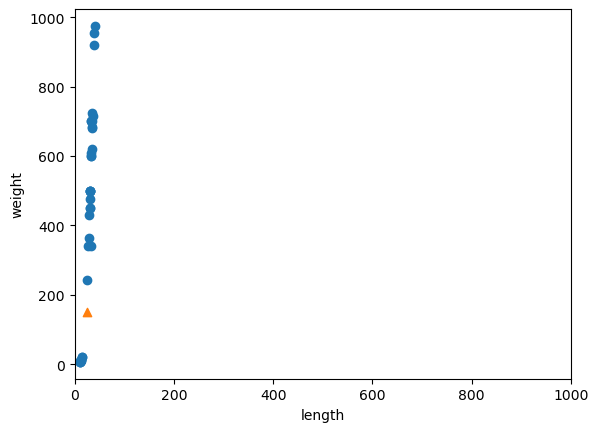

In [23]:
import matplotlib.pylab as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [26]:
# 측정 수치 [25, 150] 최근접 이웃 5개 kneighbors
distances, indexes = kn.kneighbors([[25, 150]])

In [28]:
print(indexes)
train_target[indexes]

[[31 27 25  0 16]]


array([[1., 0., 0., 0., 0.]])

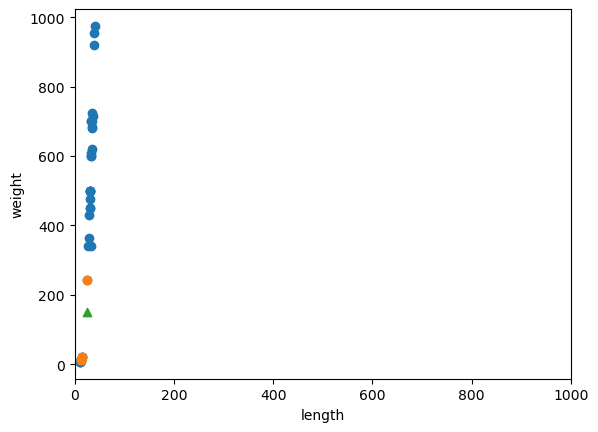

In [30]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [34]:
# 평균구하기
mean = np.mean(train_input, axis=0) # 행기준
# print(mean) # 길이와 무게에 대한 평균이 나옴

# 표준 편차
std = np.std(train_input, axis=0)
# print(std) # 길이, 무게에 대한 표준 편차

[  9.7643575  301.94896126]


In [37]:
# 표준 점수로 훈련 세트 전처리
train_scaled = (train_input - mean) / std 
print(train_scaled)

[[-1.47674278 -1.37139623]
 [ 1.19624415  1.74701158]
 [ 0.29500718  0.0745435 ]
 [ 0.68417769  0.60443438]
 [ 0.22331787 -0.21358466]
 [ 0.42814446  0.15733895]
 [ 0.78659098  0.63755256]
 [ 0.4793511   0.2401344 ]
 [ 1.19624415  1.63109796]
 [ 1.45227738  1.81324794]
 [ 0.63297104  0.902498  ]
 [-1.59963873 -1.38331877]
 [ 0.83779763  0.98529345]
 [-1.66108671 -1.39259186]
 [ 0.83779763  0.902498  ]
 [-1.5177081  -1.38331877]
 [-1.49722544 -1.37537041]
 [ 0.94021092  0.94886345]
 [ 0.53055775 -0.28975648]
 [ 0.53055775  0.5713162 ]
 [ 0.73538434  0.85282073]
 [ 0.22331787  0.00830714]
 [-1.67132804 -1.39093595]
 [-1.74301734 -1.39358541]
 [-1.62012139 -1.38364996]
 [-1.28215752 -1.35053178]
 [ 0.32573117  0.0745435 ]
 [-1.21046822 -1.34986941]
 [-0.03271536 -0.28975648]
 [ 0.42814446  0.2401344 ]
 [ 0.63297104  0.902498  ]
 [-0.14536998 -0.61431464]
 [ 0.39742047  0.2401344 ]
 [ 0.83779763  0.83626164]
 [ 0.53055775  0.5713162 ]
 [ 0.29500718  0.2401344 ]]


In [40]:
new = (np.array([25, 150]) - mean) / std
print(new)

[-0.1863353  -0.91900189]


In [42]:
test_scaled = (test_input - mean) / std

In [43]:
kn.fit(train_scaled, train_target) # 훈련시킨다
kn.score(test_scaled, test_target)

1.0

In [45]:
# 다시 예측
kn.predict([new])

array([1.])

In [46]:
distances, indexes = kn.kneighbors([new])
print(indexes)

[[31 28  4 18 21]]


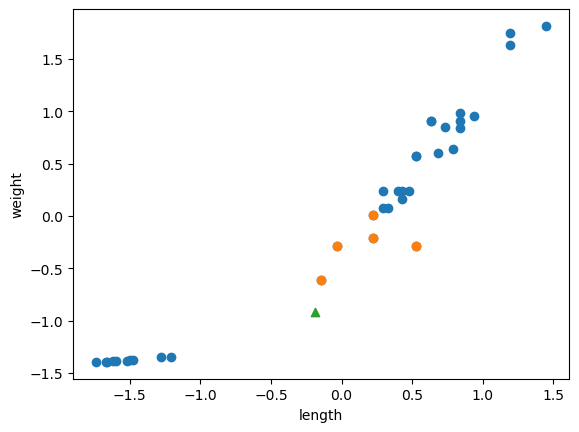

In [47]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
# plt.scatter(25, 150, marker='^')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler() # fit, fransform - 표준 점수 ㅂ변환

In [51]:
ss.fit(fish_data)

StandardScaler()

In [53]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [54]:
# 학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [55]:
kn.score(test_scaled, test_target)

1.0

In [57]:
kn.predict([new])

array([1.])